# Data set: Tips
# Author : Manar ,,,,,,
# Date : 26/5/2021

In [211]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns


# Bill and Tips Prediction
## this dataset has :
- columns : 7 

- rows : 244

retreving dataset from csv file and convert it to pandas DATAFRAME


In [212]:
tips_df = sns.load_dataset("tips").dropna()
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# viewing Data Shape

In [213]:
print(f"Data Shape: {tips_df.shape}")

Data Shape: (244, 7)


# viewing Data by gender

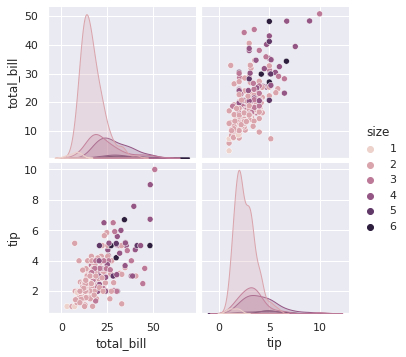

In [214]:
sns.pairplot(tips_df ,  hue='size')
plt.show()

# here I can see a strong impact of the size 

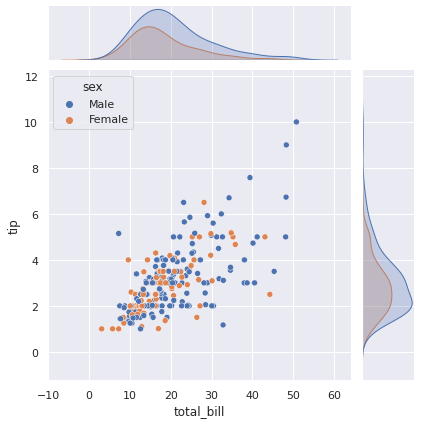

In [215]:
sns.jointplot(data=tips_df, x="total_bill", y="tip", hue="sex")

# devide the data set to two data sets based on gender

In [216]:
tips_df_males = tips_df.loc[tips_df["sex"] != 'Female']
tips_df_females = tips_df.loc[tips_df["sex"] != 'Male']
tips_df_males.shape

(157, 7)

In [217]:
tips_df_females.shape

(87, 7)

# Viewing pairplot for females

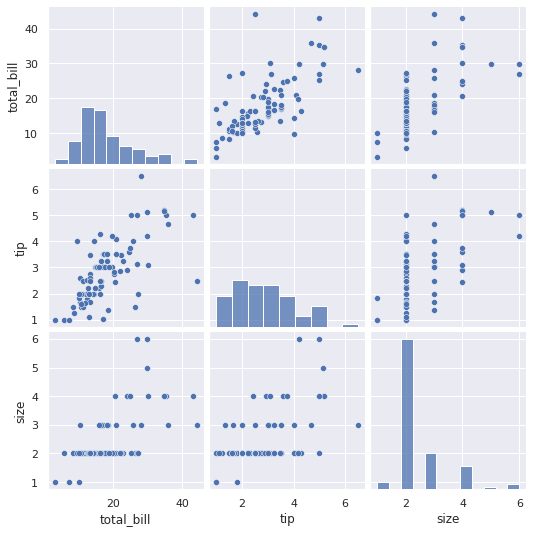

In [218]:
sns.pairplot(tips_df_females )
plt.show()

# Viwing pairplot for males

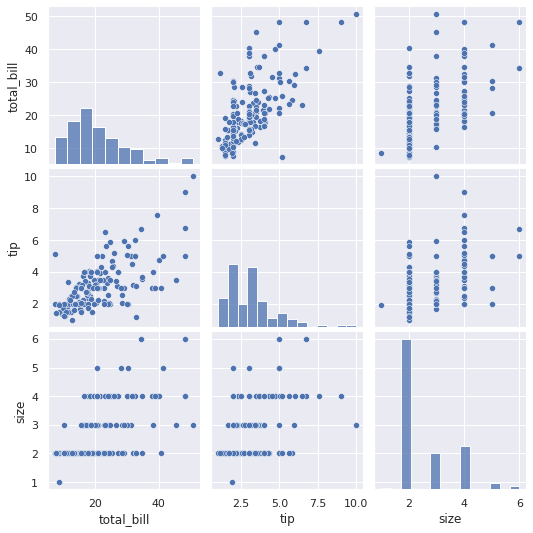

In [219]:
sns.pairplot(tips_df_males)
plt.show()

# ignoring the differance of numbers , there is no big differance between males and females 

# viesing Data by time

/home/manar/Asackwork/401Level/data-visualization/.venv/lib/python3.9/site-packages/seaborn/distributions.py:1182: UserWarning: The following kwargs were not used by contour: 'col', 'style', 'size'
  cset = contour_func(


Text(0.5, 0, 'total bill')

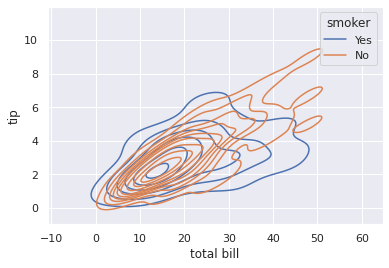

In [220]:
sns.kdeplot(data=tips_df,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",)
plt.xlabel('total bill')


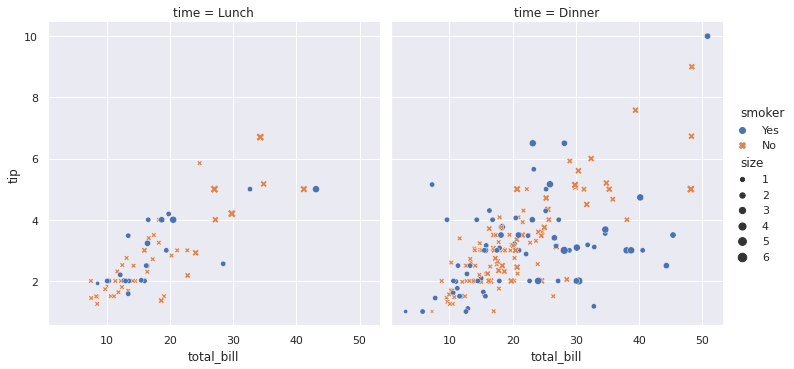

In [221]:
sns.relplot(
    data=tips_df,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

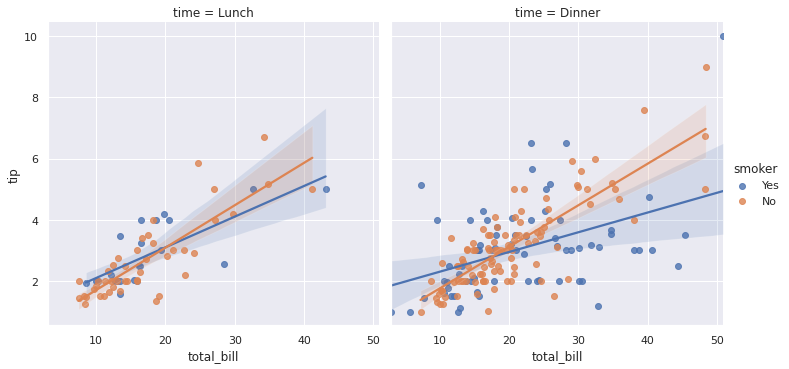

In [222]:
sns.lmplot(data=tips_df, x="total_bill", y="tip", col="time", hue="smoker")

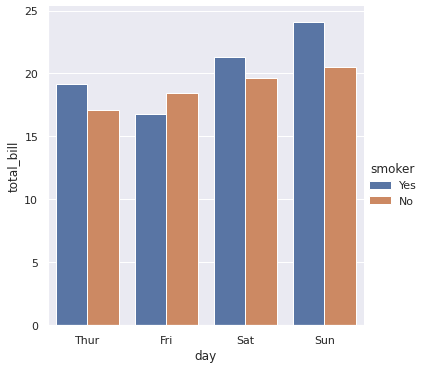

In [223]:
sns.catplot(data=tips_df, kind="bar", x="day", y="total_bill", hue="smoker" , ci=None )

# ignoring the numbers again , I can see differances between smokers and non smokers

# here I check the time and the bill relation

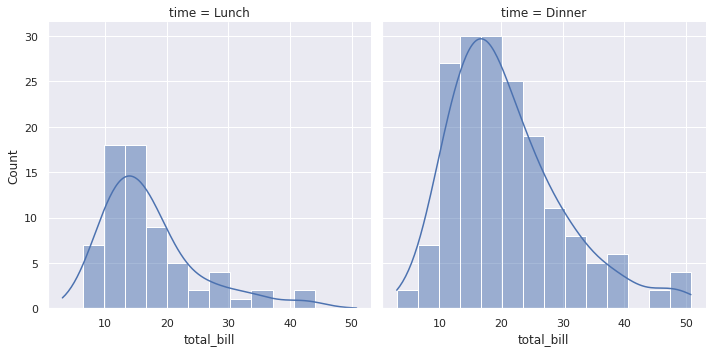

In [224]:
sns.displot(data=tips_df, x="total_bill", col="time", kde=True)

# it seems like there is a relation between them .. lets use barplot 

<AxesSubplot:xlabel='time', ylabel='tip'>

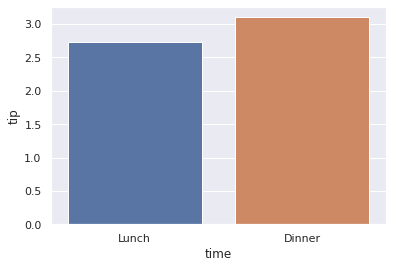

In [225]:
sns.barplot(data=tips_df , x='time' , y='tip', ci=None )

# now lets visualize the day and tip

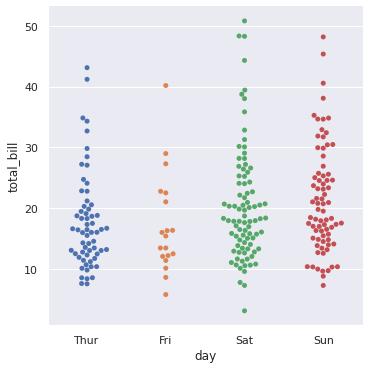

In [226]:
sns.catplot(data=tips_df, kind="swarm", x="day", y="total_bill")

<AxesSubplot:xlabel='day', ylabel='tip'>

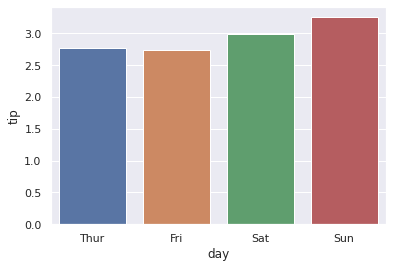

In [227]:
sns.barplot(data=tips_df , x='day' , y='tip' , ci=None )

# so , people give more tips on sunday and saterday but the result are so close

# Assumptions : 

1. there a correlation between the bills and tips
2. there is a linear realtion between time and tips
3. there is a linear realtion between size and tips
3. we can predict the tips using bills , time, and size

##  Starting training the data

In [228]:
X = tips_df['total_bill'].values
y = tips_df['tip'].values
X

array([16.99, 10.34, 21.01, 23.68, 24.59, 25.29,  8.77, 26.88, 15.04,
       14.78, 10.27, 35.26, 15.42, 18.43, 14.83, 21.58, 10.33, 16.29,
       16.97, 20.65, 17.92, 20.29, 15.77, 39.42, 19.82, 17.81, 13.37,
       12.69, 21.7 , 19.65,  9.55, 18.35, 15.06, 20.69, 17.78, 24.06,
       16.31, 16.93, 18.69, 31.27, 16.04, 17.46, 13.94,  9.68, 30.4 ,
       18.29, 22.23, 32.4 , 28.55, 18.04, 12.54, 10.29, 34.81,  9.94,
       25.56, 19.49, 38.01, 26.41, 11.24, 48.27, 20.29, 13.81, 11.02,
       18.29, 17.59, 20.08, 16.45,  3.07, 20.23, 15.01, 12.02, 17.07,
       26.86, 25.28, 14.73, 10.51, 17.92, 27.2 , 22.76, 17.29, 19.44,
       16.66, 10.07, 32.68, 15.98, 34.83, 13.03, 18.28, 24.71, 21.16,
       28.97, 22.49,  5.75, 16.32, 22.75, 40.17, 27.28, 12.03, 21.01,
       12.46, 11.35, 15.38, 44.3 , 22.42, 20.92, 15.36, 20.49, 25.21,
       18.24, 14.31, 14.  ,  7.25, 38.07, 23.95, 25.71, 17.31, 29.93,
       10.65, 12.43, 24.08, 11.69, 13.42, 14.26, 15.95, 12.48, 29.8 ,
        8.52, 14.52,

In [229]:
X=X.reshape(-1,1)


In [230]:
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=100)

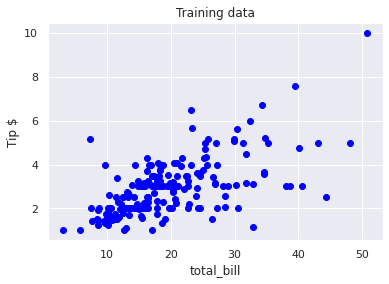

In [231]:
%matplotlib inline
plt.scatter(x_train,y_train,color='blue')
plt.xlabel('total_bill')
plt.ylabel('Tip $')
plt.title('Training data')
plt.show()

In [232]:
lm = LinearRegression()
lm.fit(x_train,y_train)
y_predict = lm.predict(x_test)
print(f"Train accuracy {round(lm.score(x_train,y_train)*100,2)} %")
print(f"Test accuracy {round(lm.score(x_test,y_test)*100,2)} %")

Train accuracy 39.89 %
Test accuracy 55.27 %


## here is the accuracy is belew 75% .. so lets add more variables

In [233]:
dummy_df = tips_df[['total_bill' ,  'day' , 'sex', 'smoker' , 	'time','size' ]]


In [234]:
# X = dummy_df[['total_bill' , 'time' , 'day_Sat', ]]
X = pd.get_dummies(data=dummy_df)
y = tips_df['tip']


In [235]:
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=100)

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(146, 12)
(98, 12)
(146,)
(98,)


In [237]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

# here we will start predicting

In [238]:
predictions = model.predict(X_test)
predictions

array([2.23827504, 2.89321479, 2.36627022, 3.84875369, 3.84274948,
       2.12040997, 6.52009768, 2.29074147, 1.35750594, 1.82538497,
       3.32751686, 2.71562809, 1.84302389, 2.07356237, 2.35530204,
       2.68149171, 2.41253335, 3.37615406, 2.21344103, 3.01712308,
       2.64511146, 3.69055162, 4.31983584, 2.35507669, 4.18524398,
       2.04323973, 2.93942178, 3.50424062, 5.00357805, 3.46194222,
       5.68724839, 4.14393877, 2.49073196, 6.61910306, 3.13021657,
       2.38431799, 3.21500659, 2.34190364, 3.71501867, 3.81846366,
       2.58890786, 5.117217  , 4.50987213, 5.74606295, 3.37153083,
       2.21082731, 3.32585105, 4.54554684, 1.72409143, 2.72730453,
       3.56111409, 3.15547526, 2.71615002, 4.06770175, 4.70800793,
       2.75976438, 2.32757203, 2.57509486, 2.86764536, 3.10642279,
       4.37037323, 3.16983007, 2.81301576, 1.9782703 , 2.17323155,
       3.23646803, 2.28795853, 3.27625074, 3.19976494, 3.86755117,
       2.83472976, 2.53049357, 2.91789507, 3.93275202, 2.48030

/home/manar/Asackwork/401Level/data-visualization/.venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tip'>

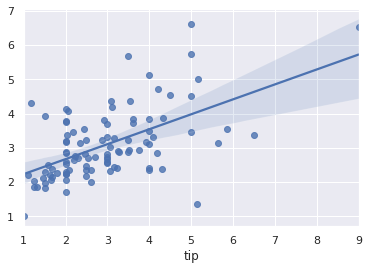

In [239]:
sns.regplot(y_test,predictions)

In [240]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     22.12
Date:                Wed, 26 May 2021   Prob (F-statistic):           2.30e-21
Time:                        21:24:27   Log-Likelihood:                -197.56
No. Observations:                 146   AIC:                             413.1
Df Residuals:                     137   BIC:                             440.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2120      0.090      2.356      

In [241]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
predictions

0      2.735655
1      2.250867
2      3.259044
3      3.335332
4      3.805740
         ...   
239    3.920852
240    3.516091
241    3.057514
242    2.685660
243    2.768008
Length: 244, dtype: float64

In [242]:
print_model = model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     26.06
Date:                Wed, 26 May 2021   Prob (F-statistic):           1.20e-28
Time:                        21:24:27   Log-Likelihood:                -347.48
No. Observations:                 244   AIC:                             713.0
Df Residuals:                     235   BIC:                             744.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
total_bill      0.0945      0.010      9.841      0.000       0.076       0.113
size            0.1760      0.090      1.966      0.051      -0.000       0.352
day_Thur        0.0152      0.305      0.050      0.960      -0.585       0.616
day_Fri         0.1775      0.196      0.905      0.366      -0.209       0.564
day_Sat         0.0560      0.194      0.289      0.773      -0.326       0.438
day_Sun         0.1520      0.202      0.751      0.453      -0.247       0.551
sex_Male        0.1841      0.092      2.000      0.047       0.003       0.365
sex_Female      0.2166      0.093      2.324      0.021       0.033       0.400
smoker_Yes      0.1571      0.094      1.672      0.096      -0.028       0.342
smoker_No       0.2435      0.095      2.562      0.011       0.056       0.431
time_Lunch      0.2344      0.247      0.948      0.344      -0.253       0.722
time_Dinner     0.1663      0.212      0.786      0.433      -0.251       0.583
==============================================================================
Omnibus:                       27.860   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.555
Skew:                           0.607   Prob(JB):                     3.87e-12
Kurtosis:                       4.923   Cond. No.                     2.83e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.46e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [243]:
y_pred = model.predict(X_test)

In [244]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
151,2.00,2.338494
34,3.27,2.681881
109,4.00,2.300044
4,3.61,3.805740
114,4.00,3.735574
...,...,...
108,3.76,2.725345
9,3.23,2.494398
191,4.19,2.847050
36,2.00,2.718977


In [245]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.8071723128159797
Mean Squared Error: 1.16749410384634
Root Mean Squared Error: 1.0805064108307456


In [246]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)*100

33.334010500292564

### OMG thats worst (:

# the end ...

just kidding
From here I will use another dataset for the same idea 

In [250]:
new_tip_df = pd.read_csv("./tips.csv")
new_tip_df.head()

,Bill,Tips
0,16,0
1,23,0
2,13,0
3,90,5
4,56,0


In [252]:
X = new_tip_df['Bill'].values
y = new_tip_df['Tips'].values
X

array([ 16,  23,  13,  90,  56,  27,  94,  52,   7,  22,  90,  15,  27,
        93,  27,  17, 120,   7, 165,  67,  19,  12,  78,  19,  83,  45,
        41,  86,  37,   8, 112,  22,  53,   0, 100,   8,  16,  35, 150,
        25,  48,  17, 135,  10,  55,  36,  17,  10,  29,  11])

In [253]:
X=X.reshape(-1,1)

In [254]:
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=100)

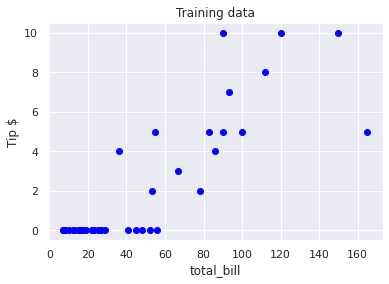

In [255]:
%matplotlib inline
plt.scatter(x_train,y_train,color='blue')
plt.xlabel('total_bill')
plt.ylabel('Tip $')
plt.title('Training data')
plt.show()

In [256]:
lm = LinearRegression()
lm.fit(x_train,y_train)
y_predict = lm.predict(x_test)
print(f"Train accuracy {round(lm.score(x_train,y_train)*100,2)} %")
print(f"Test accuracy {round(lm.score(x_test,y_test)*100,2)} %")

Train accuracy 72.06 %
Test accuracy 70.91 %


ummm ... this one is better but still below 75% ..

the test failed .. Done